## NeuralProphet

In [1]:

#!python -m pip install "AI4Water[all] @ git+https://github.com/AtrCheema/AI4Water.git@dev"

In [2]:

import neuralprophet
neuralprophet.__version__

'0.6.0'

In [33]:

import pandas as pd

from neuralprophet import NeuralProphet, set_log_level

from SeqMetrics import RegressionMetrics

from easy_mpl import plot

from ai4water.datasets import CAMELS_AUS
from ai4water.utils import TrainTestSplit
from ai4water.utils.utils import get_version_info

for k,v in get_version_info().items():
    print(k, v)

python 3.8.16 | packaged by conda-forge | (default, Feb  1 2023, 15:53:35) [MSC v.1929 64 bit (AMD64)]
os nt
ai4water 1.07
lightgbm 3.3.5
catboost 1.1.1
xgboost 1.7.5
easy_mpl 0.21.3
SeqMetrics 1.3.4
torch 1.13.1+cpu
numpy 1.23.5
pandas 1.5.3
matplotlib 3.7.1
h5py 3.8.0
sklearn 1.2.2
shapefile 2.3.1
xarray 2023.1.0
netCDF4 1.6.3
optuna 2.10.1
skopt 0.9.0
hyperopt 0.2.7
plotly 5.14.1
seaborn 0.12.2


In [5]:
dataset = CAMELS_AUS(path="F:\\data\\CAMELS\\CAMELS_AUS")

In [6]:
df = dataset.fetch(
    stations='224214A', 
    dynamic_features = ['et_morton_actual_SILO', 'precipitation_SILO', 'solarrad_AWAP', 'tmax_SILO', 'streamflow_MLd'],
    as_dataframe=True
)

df = df.unstack()

df = df['224214A']

df.columns.name = None

df.index.name = "ds"

df = df.rename(columns={"streamflow_MLd": "y"})
df

et_morton_actual_SILO  precipitation_SILO  solarrad_AWAP  \
ds                                                                     
1957-01-01               5.018771            0.000000            NaN   
1957-01-02               5.416592            0.000000            NaN   
1957-01-03               4.482849            0.000000            NaN   
1957-01-04               6.804860            0.000000            NaN   
1957-01-05               5.007039            0.000000            NaN   
...                           ...                 ...            ...   
2014-12-27               5.263129            0.008045      32.807766   
2014-12-28               5.425922            0.000000      23.807978   
2014-12-29               4.498380            0.000000      25.922425   
2014-12-30               4.197989            0.450168      29.379810   
2014-12-31               5.004805            0.000000      33.166352   

            tmax_SILO        y  
ds                              
1957-01-01  22.091118      NaN  
1957-01-02  28.809553      NaN  
1957-01-03  29.119274      NaN  
1957-01-04  26.813073      NaN  
1957-01-05  23.270336      NaN  
...               ...      ...  
2014-12-27  22.333185  83.2549  
2014-12-28  25.113855  76.4695  
2014-12-29  26.736648  72.6336  
2014-12-30  20.986034  69.1004  
2014-12-31  22.560168  66.0808  

[21184 rows x 5 columns]

In [7]:
df = df.loc["2000-01-01":]
df

et_morton_actual_SILO  precipitation_SILO  solarrad_AWAP  \
ds                                                                     
2000-01-01               3.961508            3.679721      24.554794   
2000-01-02               5.317374            0.000000      27.449486   
2000-01-03               4.007151            0.002961      22.702022   
2000-01-04               2.967430            2.565531      20.007665   
2000-01-05               2.111508            3.972682       3.976866   
...                           ...                 ...            ...   
2014-12-27               5.263129            0.008045      32.807766   
2014-12-28               5.425922            0.000000      23.807978   
2014-12-29               4.498380            0.000000      25.922425   
2014-12-30               4.197989            0.450168      29.379810   
2014-12-31               5.004805            0.000000      33.166352   

            tmax_SILO        y  
ds                              
2000-01-01  14.955810  60.6560  
2000-01-02  21.279665  56.8683  
2000-01-03  25.350224  48.7311  
2000-01-04  18.255531  41.3633  
2000-01-05  13.034805  38.9581  
...               ...      ...  
2014-12-27  22.333185  83.2549  
2014-12-28  25.113855  76.4695  
2014-12-29  26.736648  72.6336  
2014-12-30  20.986034  69.1004  
2014-12-31  22.560168  66.0808  

[5479 rows x 5 columns]

In [8]:
df.isna().sum()

et_morton_actual_SILO     0
precipitation_SILO        0
solarrad_AWAP             0
tmax_SILO                 0
y                        65
dtype: int64

In [9]:
df = df.fillna(method="ffill")
df.isna().sum()

et_morton_actual_SILO    0
precipitation_SILO       0
solarrad_AWAP            0
tmax_SILO                0
y                        0
dtype: int64

In [10]:
df = df.reset_index()
df

ds  et_morton_actual_SILO  precipitation_SILO  solarrad_AWAP  \
0    2000-01-01               3.961508            3.679721      24.554794   
1    2000-01-02               5.317374            0.000000      27.449486   
2    2000-01-03               4.007151            0.002961      22.702022   
3    2000-01-04               2.967430            2.565531      20.007665   
4    2000-01-05               2.111508            3.972682       3.976866   
...         ...                    ...                 ...            ...   
5474 2014-12-27               5.263129            0.008045      32.807766   
5475 2014-12-28               5.425922            0.000000      23.807978   
5476 2014-12-29               4.498380            0.000000      25.922425   
5477 2014-12-30               4.197989            0.450168      29.379810   
5478 2014-12-31               5.004805            0.000000      33.166352   

      tmax_SILO        y  
0     14.955810  60.6560  
1     21.279665  56.8683  
2     25.350224  48.7311  
3     18.255531  41.3633  
4     13.034805  38.9581  
...         ...      ...  
5474  22.333185  83.2549  
5475  25.113855  76.4695  
5476  26.736648  72.6336  
5477  20.986034  69.1004  
5478  22.560168  66.0808  

[5479 rows x 6 columns]

In [14]:
tr_df, test_df = df.iloc[0:4000], df.iloc[4000:]
tr_df.shape, test_df.shape

((4000, 6), (1479, 6))

In [36]:

# Disable logging messages unless there is an error
set_log_level("ERROR")

In [37]:

# Setup model with uncertainty using the 10th and 90th percentiles
confidence_level = 0.9

boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]


In [38]:


# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
    quantiles=quantiles
)



In [39]:
m.set_plotting_backend("plotly")

In [40]:

# Add the new lagged regressor
m.add_lagged_regressor("precipitation_SILO")
m.add_lagged_regressor("et_morton_actual_SILO")
m.add_lagged_regressor("solarrad_AWAP")
m.add_lagged_regressor("tmax_SILO")

In [41]:

# Continue training the model and making a prediction
metrics = m.fit(tr_df)
metrics

Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

MAE        RMSE      Loss  RegLoss  epoch
0    420.645996  550.557861  1.889953      0.0      0
1    390.418457  516.312866  1.690207      0.0      1
2    351.047699  488.048035  1.465815      0.0      2
3    297.782623  436.294617  1.196393      0.0      3
4    236.405487  380.402588  0.932310      0.0      4
..          ...         ...       ...      ...    ...
125   22.751520   69.526901  0.074759      0.0    125
126   22.817049   67.402435  0.074954      0.0    126
127   22.723234   69.402115  0.074616      0.0    127
128   22.728725   69.540840  0.074681      0.0    128
129   22.728127   70.734436  0.074631      0.0    129

[130 rows x 5 columns]

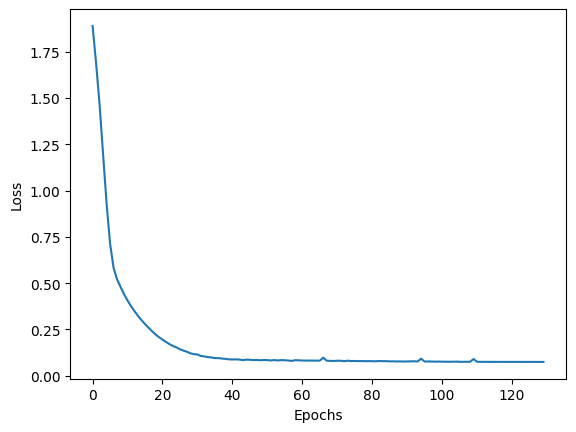

<Axes: xlabel='Epochs', ylabel='Loss'>

In [42]:
plot(metrics['Loss'].values, ax_kws=dict(xlabel="Epochs", ylabel="Loss"))

In [43]:
tr_forecast = m.predict(tr_df)
RegressionMetrics(tr_df['y'].values[11:],
                  tr_forecast['yhat1'].values[11:]).nse()

Predicting: 125it [00:00, ?it/s]

0.44777341496945566

In [44]:
forecast = m.predict(test_df)
forecast.head(12)

Predicting: 125it [00:00, ?it/s]

ds         y      yhat1  yhat1 5.0%  yhat1 95.0%        ar1  \
0  2010-12-14   88.3681        NaN         NaN          NaN        NaN   
1  2010-12-15   86.5555        NaN         NaN          NaN        NaN   
2  2010-12-16   90.3651        NaN         NaN          NaN        NaN   
3  2010-12-17   95.8426        NaN         NaN          NaN        NaN   
4  2010-12-18   88.1180        NaN         NaN          NaN        NaN   
5  2010-12-19   82.3859        NaN         NaN          NaN        NaN   
6  2010-12-20   90.0842        NaN         NaN          NaN        NaN   
7  2010-12-21  110.9450        NaN         NaN          NaN        NaN   
8  2010-12-22  101.1360        NaN         NaN          NaN        NaN   
9  2010-12-23   85.7172        NaN         NaN          NaN        NaN   
10 2010-12-24   79.4980  90.646828   65.394096   116.492409  48.299034   
11 2010-12-25   75.4952  81.773285   56.779980    81.773285  46.202648   

    lagged_regressor_precipitation_SILO1  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   
5                                    NaN   
6                                    NaN   
7                                    NaN   
8                                    NaN   
9                                    NaN   
10                           -180.074417   
11                           -227.209641   

    lagged_regressor_et_morton_actual_SILO1  lagged_regressor_solarrad_AWAP1  \
0                                       NaN                              NaN   
1                                       NaN                              NaN   
2                                       NaN                              NaN   
3                                       NaN                              NaN   
4                                       NaN                              NaN   
5                                       NaN                              NaN   
6                                       NaN                              NaN   
7                                       NaN                              NaN   
8                                       NaN                              NaN   
9                                       NaN                              NaN   
10                              -437.365082                       157.236862   
11                              -551.847229                       198.394272   

    lagged_regressor_tmax_SILO1      trend  season_yearly  season_weekly  \
0                           NaN        NaN            NaN            NaN   
1                           NaN        NaN            NaN            NaN   
2                           NaN        NaN            NaN            NaN   
3                           NaN        NaN            NaN            NaN   
4                           NaN        NaN            NaN            NaN   
5                           NaN        NaN            NaN            NaN   
6                           NaN        NaN            NaN            NaN   
7                           NaN        NaN            NaN            NaN   
8                           NaN        NaN            NaN            NaN   
9                           NaN        NaN            NaN            NaN   
10                   442.257172  59.528843      43.986279      -0.243144   
11                   558.019775  59.518707      43.194286      -1.693320   

    season_daily  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
5            NaN  
6            NaN  
7            NaN  
8            NaN  
9            NaN  
10     44.299057  
11     44.299057

In [45]:
forecast.isna().sum()

ds                                          0
y                                           0
yhat1                                      10
yhat1 5.0%                                 10
yhat1 95.0%                                10
ar1                                        10
lagged_regressor_precipitation_SILO1       10
lagged_regressor_et_morton_actual_SILO1    10
lagged_regressor_solarrad_AWAP1            10
lagged_regressor_tmax_SILO1                10
trend                                      10
season_yearly                              10
season_weekly                              10
season_daily                               10
dtype: int64

In [46]:
RegressionMetrics(test_df['y'].values[11:],
                  forecast['yhat1'].values[11:]).nse()

0.5527791210399725

In [49]:
m.highlight_nth_step_ahead_of_each_forecast(1)

In [50]:
m.plot(forecast, )

In [51]:
m.plot_components(forecast, components=["lagged_regressors"])

In [52]:
m.plot_parameters(components=["lagged_regressors"])

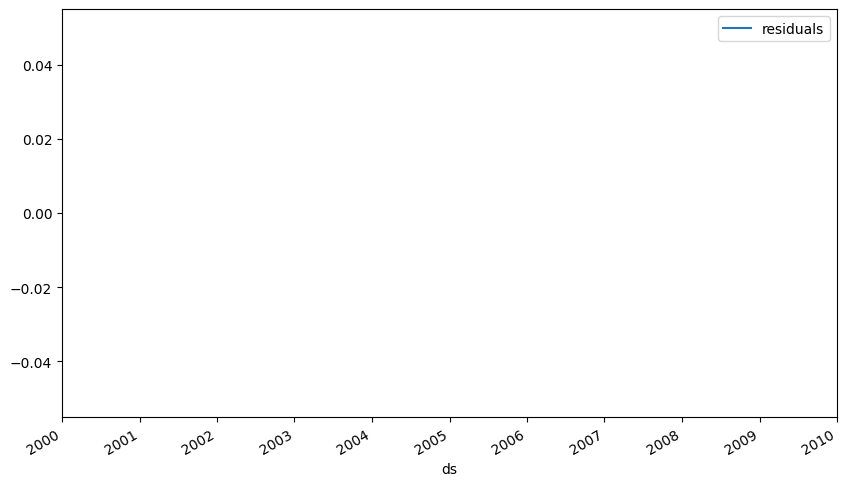

In [53]:
df_residuals = pd.DataFrame({"ds": test_df["ds"], "residuals": test_df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))